In [3]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/1b/7c/66d34dc231a309cc3a7f3eeb848319be3b616fd2918db302aaef727eff4a/scikit_learn-1.3.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/e9/20/2d0561ab54d857365926c5b53538369a7b8d6ccbffaca509305b074028cd/scipy-1.11.2-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     -------------------- ------------------- 30.7/59.1 kB 1.4 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/59.1 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 626.5 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.

In [4]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [37]:
n_samples = 1000
X1, y = make_circles(n_samples,
                    noise        = 0.03,
                    random_state = 42)

In [38]:
X1.shape

(1000, 2)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [7]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.945

In [10]:
def plot_decision_boundary(model, X, y):
  # Create a grid of points that covers the feature space
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  # Use the classifier to make predictions for each point in the grid
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

  # Plot the data points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary of Decision Tree Classifier')
  plt.show()

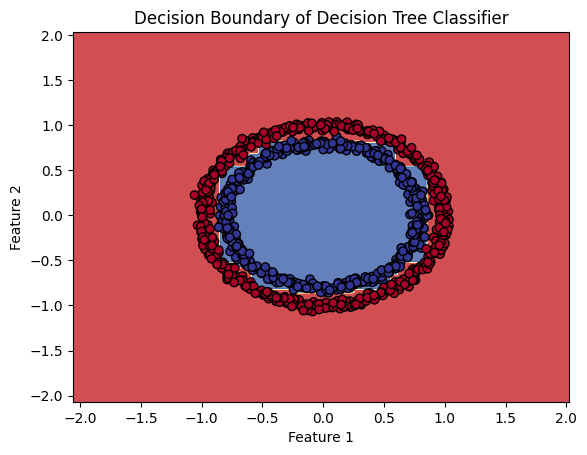

In [11]:
plot_decision_boundary(clf, X, y)

In [79]:
def elbow(X):
  distortions = []
  K_range = range(1, 11)  # Try different values of K
  for k in K_range:
      kmeans = KMeans(n_clusters=k)
      kmeans.fit(X)  # data is your dataset
      distortions.append(kmeans.inertia_)

  plt.figure(figsize=(8, 6))
  plt.plot(K_range, distortions, marker='o')
  plt.title('Elbow Method for Optimal K')
  plt.xlabel('Number of Clusters (K)')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show()

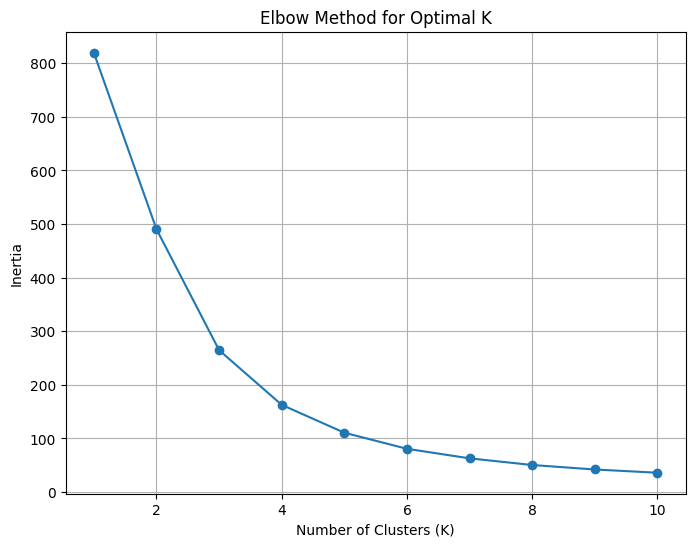

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [58]:
def visulize(K):
  # Get cluster assignments
  cluster_labels = kmeans.labels_

  # Get cluster centers
  cluster_centers = kmeans.cluster_centers_

  # Create a scatter plot for each cluster
  plt.figure(figsize=(8, 6))

  for cluster_label in range(K):
      # Select data points for the current cluster
      cluster_data = X[cluster_labels == cluster_label]

      # Plot the data points for the current cluster with a unique color
      plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label + 1}')

  # Plot cluster centers as well
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centroids')

  plt.title('K-means Clustering')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.legend()
  plt.grid(True)
  plt.show()

In [64]:
df = pd.read_csv("/content/drive/MyDrive/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

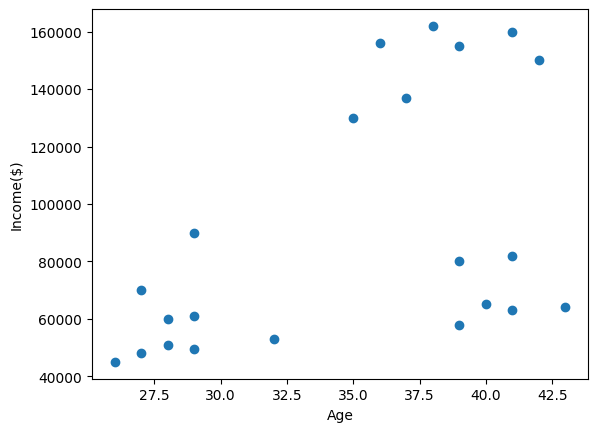

In [65]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [66]:
age = df['Age'].tolist()
income = df['Income($)'].tolist()
X = []
for i, j in zip(age, income):
  X.append(list((i,j)))
X = np.array(X) 

In [67]:
X.shape

(22, 2)

In [68]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(X)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [69]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


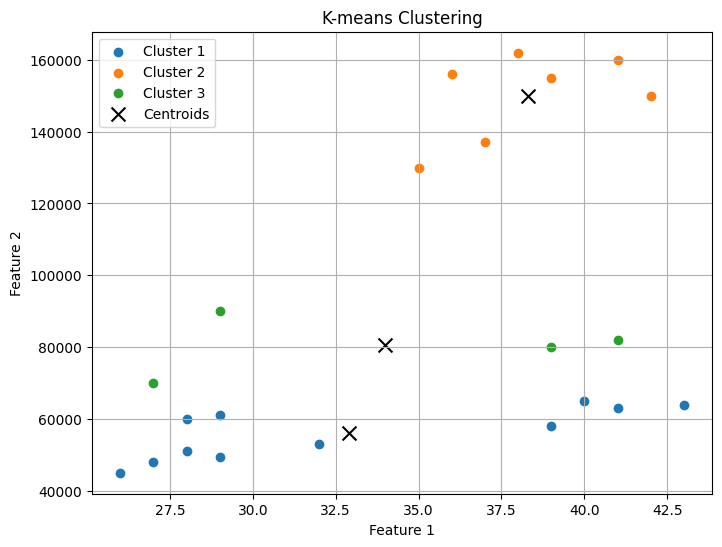

In [70]:
visulize(3)

In [71]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [72]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income($)')

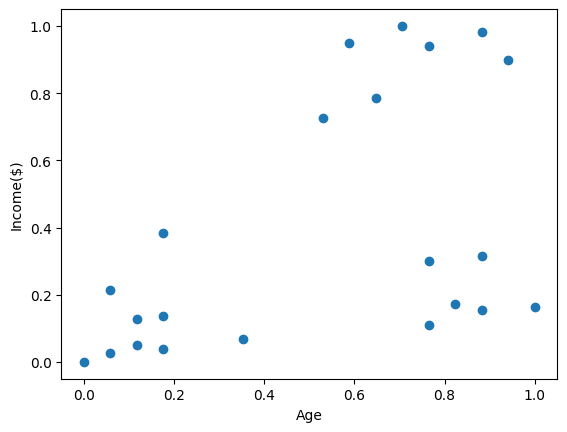

In [73]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [80]:
age = df['Age'].tolist()
income = df['Income($)'].tolist()
X = []
for i, j in zip(age, income):
  X.append(list((i,j)))
X = np.array(X)

In [81]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(X)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [82]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


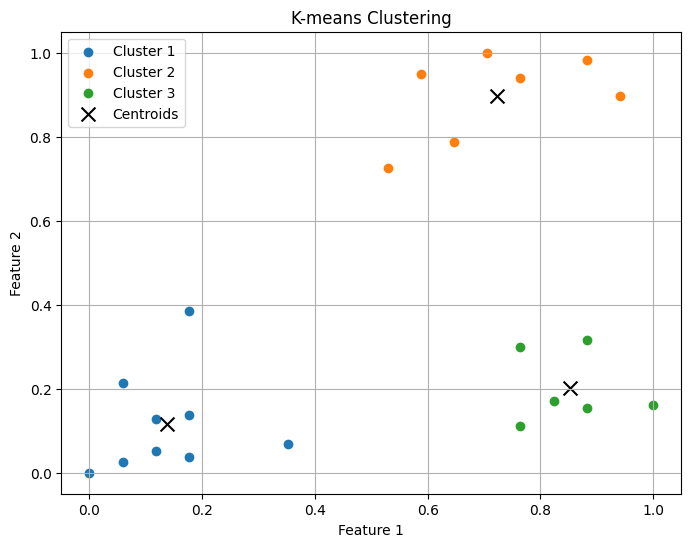

In [83]:
visulize(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

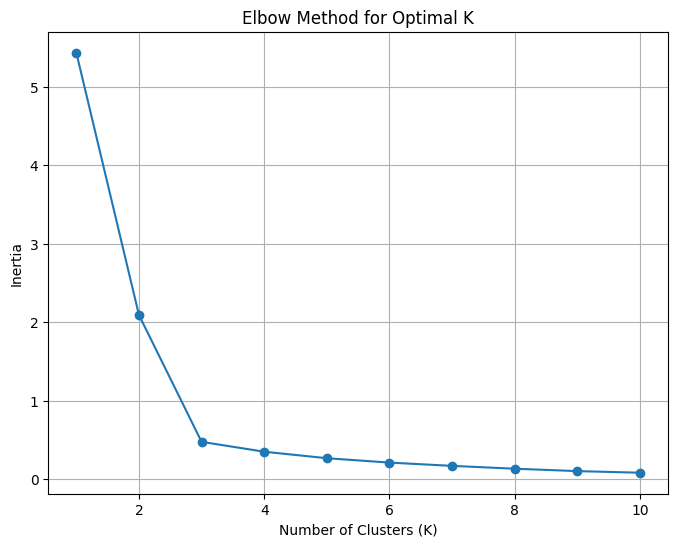

In [84]:
elbow(X)